In [1]:
import cv2
import matplotlib.pyplot as plt
import albumentations as alb

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


In [2]:
def display_imgs(imgs, titles = [], plot_size = (1,1), figsize = (10,8)):
    fig = plt.figure(figsize=figsize)
    index = 0
    for image, title in zip(imgs, titles):
        index += 1
        ax = fig.add_subplot(plot_size[0], plot_size[1], index) 
        ax.imshow(image, cmap="gray")
        ax.axis("off")
        if titles is not None:
            ax.set_title(title)

    plt.tight_layout()
    plt.show()

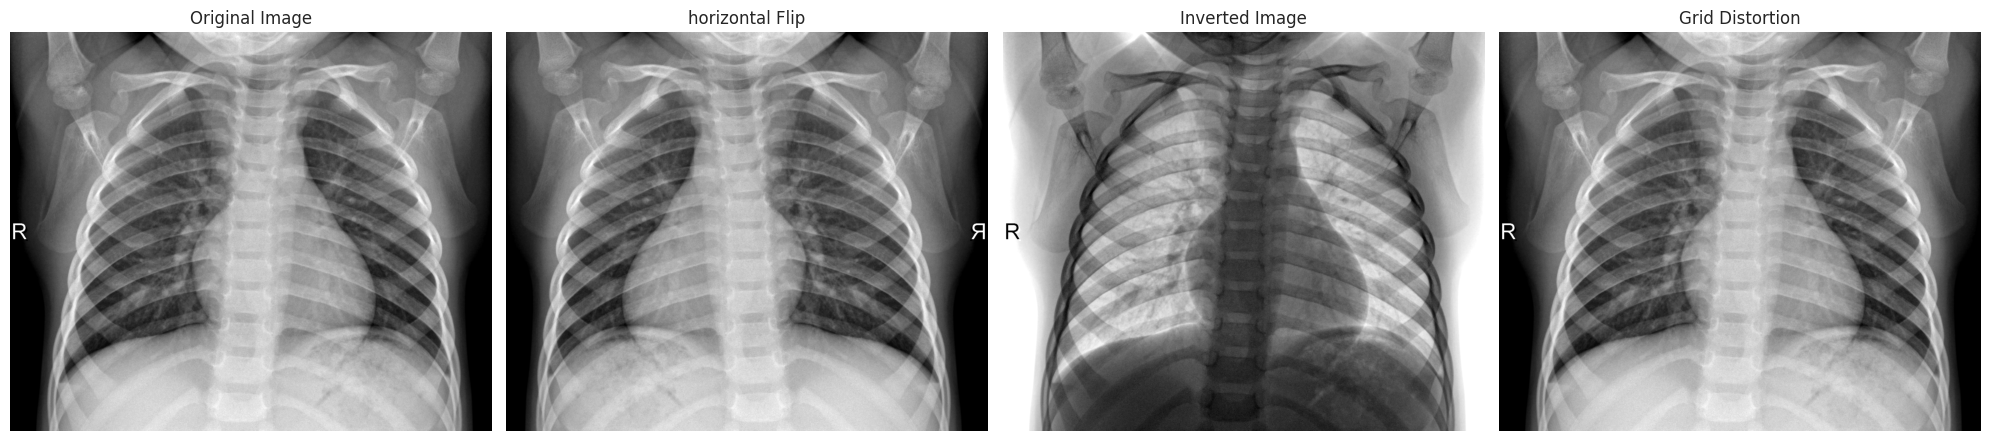

In [6]:
imgs = []
titles = []

image_path = "./../chest_Xray//train/NORMAL/NORMAL2-IM-0385-0001.jpeg"
imgs.append( cv2.imread(image_path,cv2.IMREAD_GRAYSCALE) )
titles.append("Original Image")

imgs.append( alb.hflip(imgs[0]) )
titles.append("horizontal Flip")
imgs.append( alb.InvertImg().apply(imgs[0]) )
titles.append("Inverted Image")
distortion = alb.GridDistortion(num_steps=32, distort_limit=0.7, border_mode=cv2.BORDER_CONSTANT, p=0.3)
imgs.append( distortion(image=imgs[0])['image'] )
titles.append("Grid Distortion")

display_imgs(imgs, titles, plot_size=(4,4), figsize=(20,20))